<a href="https://colab.research.google.com/github/ahdann/Analisis-TURF/blob/main/TURF_Analisis_Rumah_Makan_Padang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis Kombinasi Menu Masakan Rumah Makan Padang untuk Menentukan Kombinasi Menu Makanan yang Optimal dengan Analisis TURF
MUHAMMAD AKHDAN A`QIL - 11220940000041

**Permasalahan**

Seorang pengusaha rumah makan padang dilimpahkan dengan berbagai sumber menu makanan favorit yang disukai oleh para pelanggan. Seperti Ayam Gulai, Rendang, Telur Dadar, Ayam Goreng, Ayam Bakar, Dendeng, Ikan Mas Bakar, Tunjang, Kikil, Telur Balado. Tetapi, tidak semua menu makanan disukai semua pelanggan, dikarenakan ada beberapa menu makanan yang perlu mengeluarkan biaya lebih besar untuk bisa disantap.

Maka dari itu, sangat penting seorang pengusaha untuk mencari tahu kombinasi menu makanan apa saja yang paling optimal. Kombinasi dalam hal ini merupakan kombinasi yang dapat digunakan dengan meminimalkan biaya bahan masakan sekecil mungkin tetapi tetap mendapatkan pelanggan setidaknya 80%. Metode yang dapat digunakan untuk mencari kombinasi tersebut yaitu dengan metode analisis Total Unduplicated Reach and Frequency (TURF). Dengan metode ini, mampu menganalisis menu makanan apa saja yang dapat meminimalkan pengeluaran biaya namun tetap efisien dalam mendapatkan pelanggan.

**Deskripsi Metode**

Analisis yang digunakan merupakan analisis Total Unduplicated Reach and Frequency (TURF) yang bertujuan untuk mengevaluasi kombinasi dari menu makanan dalam mendapatkan pelanggan secara optimal pada pagi, siang, sore, dan malam. Tujuan analisis ini untuk memahami dan juga mengoptimalkan strategi, dalam permasalahan ini untuk menemukan kombinasi menu makanan yang sering di pesan oleh pelanggan tanpa duplikasi dengan jumlah menu makanan yang seminimal mungkin.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
# Pelanggan
tipe_pelanggan = ['Ibu Rumah Tangga', 'Anak Sekolah', 'Pria Pekerja']
features = [
    'Ayam Gulai', 'Rendang', 'Telur Dadar', 'Ayam Goreng',
    'Ayam Bakar', 'Dendeng', 'Ikan Mas Bakar', 'Tunjang',
    'Kikil', 'Telur Balado'
]

# Jumlah responden
num_pelanggan = 100
np.random.seed(42)

# Buat dictionary data
data = {
    'Antrian': np.arange(1, num_pelanggan + 1),
    'Pelanggan' : np.random.choice(tipe_pelanggan, num_pelanggan),
    'Waktu' : np.random.randint(1, 5, num_pelanggan) #1 Pagi 2 Siang 3 Sore 4 Malam
}

# Generate nilai 0/1 untuk setiap fitur
for feature in features:
    data[feature] = np.random.binomial(1, 0.5, num_pelanggan)

# Buat DataFrame
maindf = pd.DataFrame(data)

# Simpan ke file CSV dan XLS
maindf.to_csv('data_survey_random_elearning.csv', index=False)
maindf.to_excel('data_survey_random_elearning.xlsx', index=False)



# Tampilkan 5 baris awal
maindf


,Antrian,Pelanggan,Waktu,Ayam Gulai,Rendang,Telur Dadar,Ayam Goreng,Ayam Bakar,Dendeng,Ikan Mas Bakar,Tunjang,Kikil,Telur Balado
0,1,Pria Pekerja,4,1,1,1,1,0,0,0,0,0,0
1,2,Ibu Rumah Tangga,4,0,0,1,0,1,0,0,0,1,1
2,3,Pria Pekerja,4,0,0,0,0,1,0,1,0,1,1
3,4,Pria Pekerja,3,0,0,1,0,1,1,1,1,0,1
4,5,Ibu Rumah Tangga,3,0,0,1,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Ibu Rumah Tangga,2,0,0,0,0,0,1,1,0,0,0
96,97,Ibu Rumah Tangga,3,1,0,0,1,0,1,0,1,1,1
97,98,Pria Pekerja,4,1,0,1,1,1,0,0,1,1,0
98,99,Ibu Rumah Tangga,2,1,0,1,0,1,1,0,0,0,0


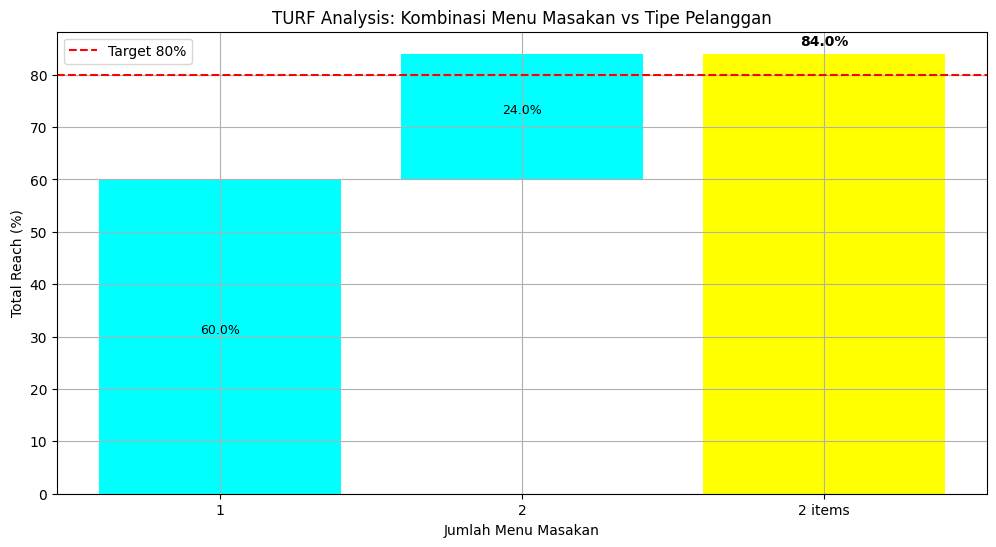

Untuk mencapai minimal 80%, perlu 2 Menu Masakan.

 Menu Masakan agar mencapai target : ['Ikan Mas Bakar', 'Telur Dadar']


In [53]:
# @title Reach vs. Jumlah Main Features
data_used = maindf #@param {type:"string"}
Waktu = '4' # @param ["All", "1", "2", "3", "4"]
Target_dalam_persen = 80 # @param

if Waktu != 'All':
  data_used = data_used[data_used['Waktu']==int(Waktu)] #Filter semester

if len(data_used)==0:
    raise SystemExit("Data kosong! Program dihentikan.")

target_reach_pct = Target_dalam_persen/100
target_reach = int(target_reach_pct * len(data_used))


index_ = data_used.columns.get_loc("Ayam Gulai")   #nomor kolom data
reach_per_item = data_used[data_used.keys()[(index_):]].sum(axis=0).sort_values(ascending=False)   #hitung frekuensi lalu sorting dari yang terbesar

#Algoritma Greedy untuk menemukan kombinasi optimal
selected_items = []
current_reach = set()
reach_progress = []

for item in reach_per_item.index:    #hitung reach
    new_reach = current_reach | set(data_used.index[data_used[item] == 1])  # Tambah reach baru
    selected_items.append(item)
    reach_progress.append(len(new_reach) / len(data_used))  # Simpan progres reach

    if len(new_reach) >= target_reach:
        break  # Selesai jika sudah mencapai target

    current_reach = new_reach  # Perbarui reach

# Hitung incremental reach
incrementals = [reach_progress[0]] + [reach_progress[i] - reach_progress[i-1] for i in range(1, len(reach_progress))]


# Bar chart bertingkat
plt.figure(figsize=(12, 6))
bottoms = 0
for i, inc in enumerate(incrementals):
    plt.bar("{}".format(i+1), inc * 100, bottom=bottoms, color="#00ffff")
    plt.text(i, bottoms + inc*50, f"{inc*100:.1f}%", ha='center', va='bottom', fontsize=9)
    bottoms += inc * 100
plt.axhline(y=target_reach_pct * 100, color='r', linestyle='--', label=f'Target {target_reach_pct*100:.0f}%')


# Bar terakhir (semua item, misal 50)
total_reach = len(set(data_used.index[data_used[selected_items[-1]] == 1])) / len(data_used)
plt.bar(f"{len(selected_items)} items", reach_progress[-1] * 100, color="yellow")
plt.text(len(selected_items), reach_progress[-1] * 100 + 1, f"{reach_progress[-1]*100:.1f}%",
         ha='center', va='bottom', fontsize=10, fontweight='bold')

#Label
plt.xlabel("Jumlah Menu Masakan")
plt.ylabel("Total Reach (%)")
plt.title("TURF Analysis: Kombinasi Menu Masakan vs Tipe Pelanggan")
plt.legend()
plt.grid(True)
plt.savefig('reach_vs_Waktu.png')
plt.show()


#Output hasil
max_reach = max(reach_progress)  # Ubah ke persen

if max_reach>=target_reach_pct:
  print(f"Untuk mencapai minimal {target_reach_pct*100:.0f}%, perlu {len(selected_items)} Menu Masakan.")
else:
  print(f"Tidak dapat mencapai {target_reach_pct*100:.0f}%.")
  print(f"maksimal hanya {max_reach*100:.0f}%, dengan {len(selected_items)} OOH")

print("\n Menu Masakan agar mencapai target :", selected_items[:len(selected_items)])  # Menampilkan Menu Makanan agar optimal


***Interpretasi Hasil***

* Menu makanan yang dominan menjangkau target minimal dalam ***satu hari penuh*** adalah "Ikan Mas Bakar", "Rendang", dan "Ayam Goreng". Kombinasi ketiganya mencapai lebih dari 80% jangkauan pada satu hari.
* Menu makanan yang dominan menjangkau pelanggan pada pagi hari adalah "Ayam Goreng" dan "Telur Dadar". Kombinasi keduanyanya mencapai lebih dari 80% jangkauan pada pagi hari.
* Fitur yang dominan menjangkau pelanggan pada siang hari adalah "Ayam Bakar" dan "Rendang". Kombinasi keduanyanya mencapai lebih dari 80% jangkauan pada siang hari.
* Fitur yang dominan menjangkau pelanggan pada sore hari adalah "Ikan Mas Bakar" dan "Rendang". Kombinasi keduanyanya mencapai lebih dari 80% jangkauan pada sore hari.
* Fitur yang dominan menjangkau pelanggan pada sore hari adalah "Ikan Mas Bakar" dan "Telur Dadar". Kombinasi keduanyanya mencapai lebih dari 80% jangkauan pada malam hari.




***KESIMPULAN***

Berdasarkan hasil analisis TURF diatas, dapat disimpulkan bahwa kombinasi tiga menu makanan yaitu "Ikan Mas Bakar", "Rendang", dan "Ayam Goreng" mampu menjangkau 90% pelanggan, melampaui target awal yaitu minimal 80%. Tetapi, hasil juga menunjukkan bahwa kombinasi menu makanan yang paling efektif berbeda pada pagi hari, siang hari, sore hari, maupun malam hari, mencerminkan variasi kebutuhan menu makanan para pelanggan berdasarkan waktu.

Hasil analisa ini menunjukkan pentingnya mengutamakan memasak menu makanan pada waktu tertentu agar lebih cepat dan efektif ketika melayani pelanggan, dan mengurangi menu yang jarang dipesan untuk menghemat pengeluaran sebuah rumah makan padang.